Attribute Information:

instr: Instructor's identifier; values taken from {1,2,3}
class: Course code (descriptor); values taken from {1-13} 
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...} 
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4} 
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5} 
Q1: The semester course content, teaching method and evaluation system were provided at the start. 
Q2: The course aims and objectives were clearly stated at the beginning of the period. 
Q3: The course was worth the amount of credit assigned to it. 
Q4: The course was taught according to the syllabus announced on the first day of class. 
Q5:	The class discussions, homework assignments, applications and studies were satisfactory. 
Q6: The textbook and other courses resources were sufficient and up to date.	
Q7: The course allowed field work, applications, laboratory, discussion and other studies. 
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.	
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures. 
Q10: My initial expectations about the course were met at the end of the period or year. 
Q11: The course was relevant and beneficial to my professional development. 
Q12: The course helped me look at life and the world with a new perspective. 
Q13: The Instructor's knowledge was relevant and up to date. 
Q14: The Instructor came prepared for classes. 
Q15: The Instructor taught in accordance with the announced lesson plan. 
Q16: The Instructor was committed to the course and was understandable. 
Q17: The Instructor arrived on time for classes. 
Q18: The Instructor has a smooth and easy to follow delivery/speech. 
Q19: The Instructor made effective use of class hours. 
Q20: The Instructor explained the course and was eager to be helpful to students. 
Q21: The Instructor demonstrated a positive approach to students. 
Q22: The Instructor was open and respectful of the views of students about the course. 
Q23: The Instructor encouraged participation in the course. 
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students. 
Q25: The Instructor responded to questions about the course inside and outside of the course. 
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives. 
Q27: The Instructor provided solutions to exams and discussed them with students. 
Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [3]:
data.head(2)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


## After looking at the dataset, let's see how we learn from it and why is it an unsupervised learning approach.

## Unsupervised Machine Learning
Unsupervised learning is where you only have input data (X) and no corresponding output variables.
<br>The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. **Algorithms are left to their own devises to discover and present the interesting structure in the data.**

Unsupervised learning problems can be further grouped into clustering and association problems :
<br>**Clustering**: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
<br>**Association**:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

Some popular examples of unsupervised learning algorithms are:
<br>**Clusturing : ** 
<br>***k-means***
<br>***Hierarchial***
<br>
<br>**Association :** 
<br>***Apriori***
<br>***FP-Growth***

In [4]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [6]:
data.shape

(5820, 33)

In [7]:
data.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [8]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [10]:
data.nunique()

instr          3
class         13
nb.repeat      3
attendance     5
difficulty     5
Q1             5
Q2             5
Q3             5
Q4             5
Q5             5
Q6             5
Q7             5
Q8             5
Q9             5
Q10            5
Q11            5
Q12            5
Q13            5
Q14            5
Q15            5
Q16            5
Q17            5
Q18            5
Q19            5
Q20            5
Q21            5
Q22            5
Q23            5
Q24            5
Q25            5
Q26            5
Q27            5
Q28            5
dtype: int64

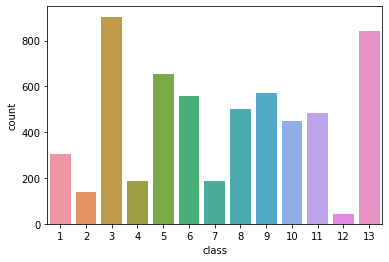

In [11]:
# finding popularity or mode of the class
sns.countplot( x='class', data=data);

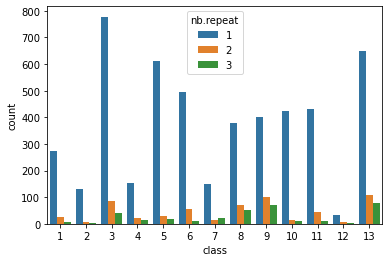

In [12]:
sns.countplot(x='class', hue='nb.repeat', data=data);

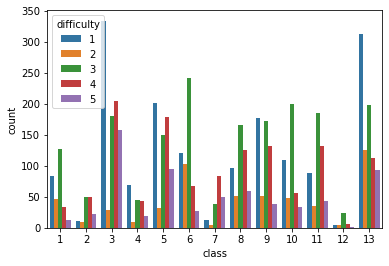

In [13]:
sns.countplot(x='class', hue='difficulty', data=data);

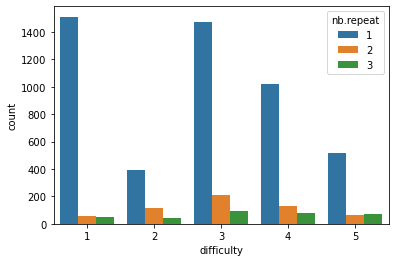

In [14]:
sns.countplot(x='difficulty', hue='nb.repeat', data=data);

Below Graph to see how the rating has been given by student for each questions

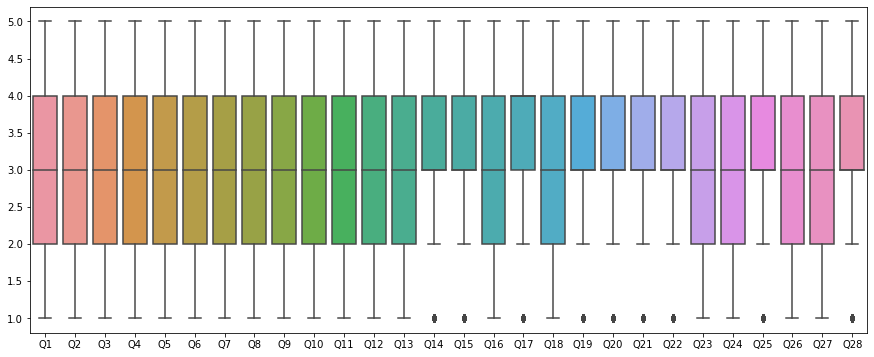

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data.loc[:,'Q1':'Q28']);

By above graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

**It was observed that Q14,Q15,Q17,Q19:Q22 and Q25 questions with good rating.**

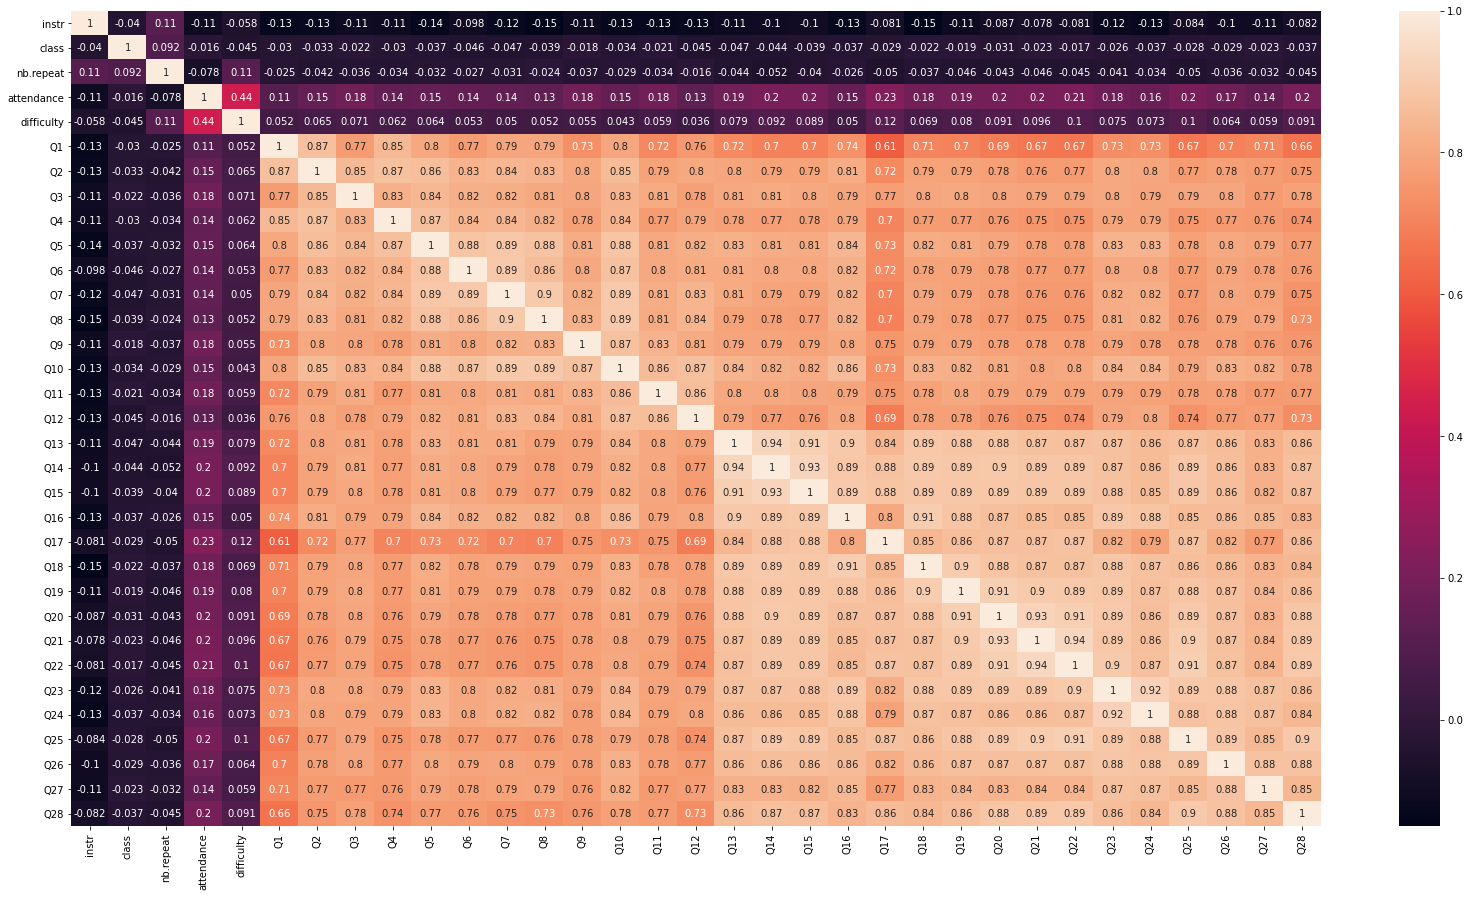

In [16]:
plt.figure(figsize=(28,15))
sns.heatmap(data.corr(), annot=True);

By above graph, we can see that very less students have given completely disagree (Rating 1) for Question Q14, Q15, Q17, Q19 - Q22, Q25

Lets understand the students have reponded for the questions against classes

In [17]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,13):
    class_data = data[(data["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


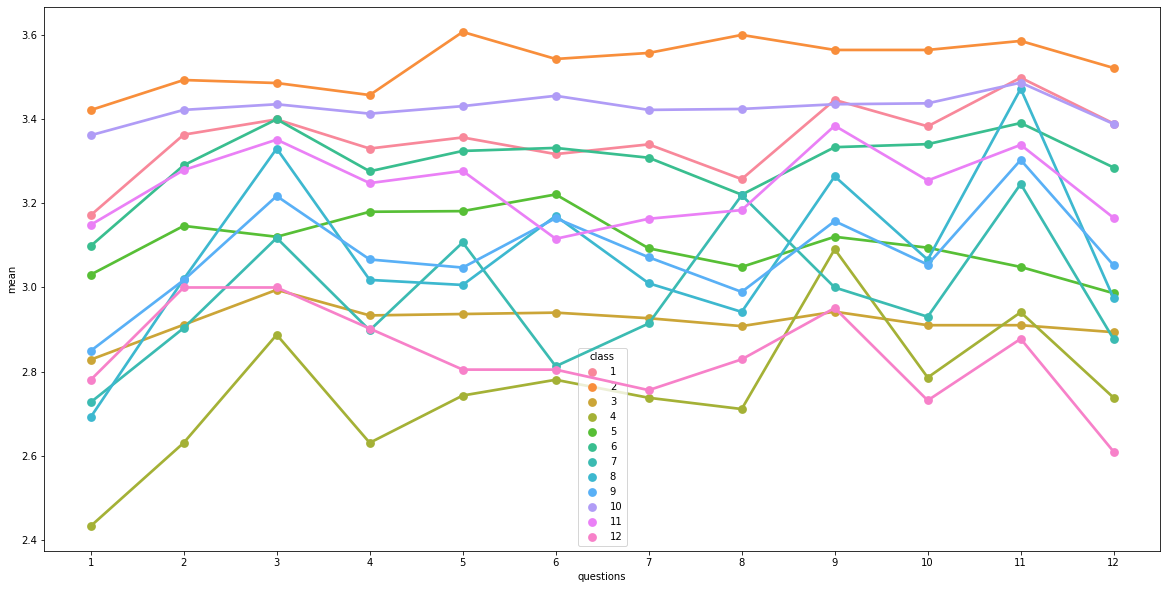

In [18]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class");

Above graph shows that we have best ratings from Class 2 and worst rateing from class 4 students

Lets see how rating has been given against instructor wise.


In [19]:
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = data[(data["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

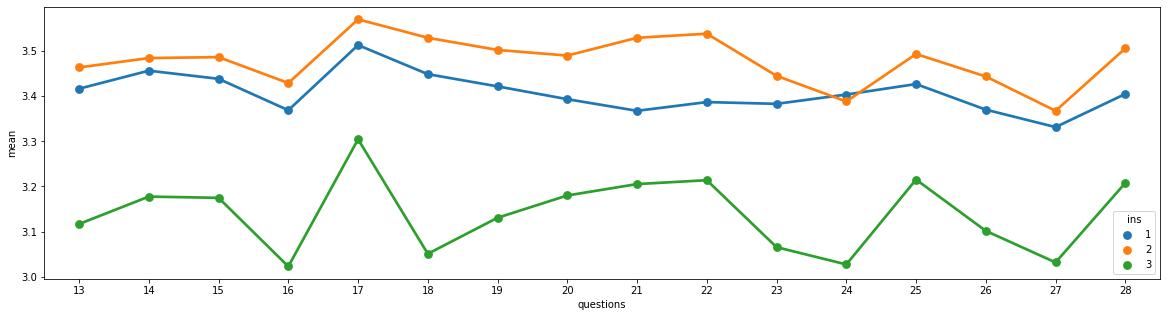

In [20]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins");

Based on above graph we can see that According to the Student ratings we see that Instructor 1 and 2 are performing well and got similar rateings but Instructor 3 got less ratings. So we can further explore which course instructor 3 teaches and find out the which course got least ratings.

In [21]:
# Calculate mean for each question response for all the classes for Instructor 3
dataset_inst3 = data[(data["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

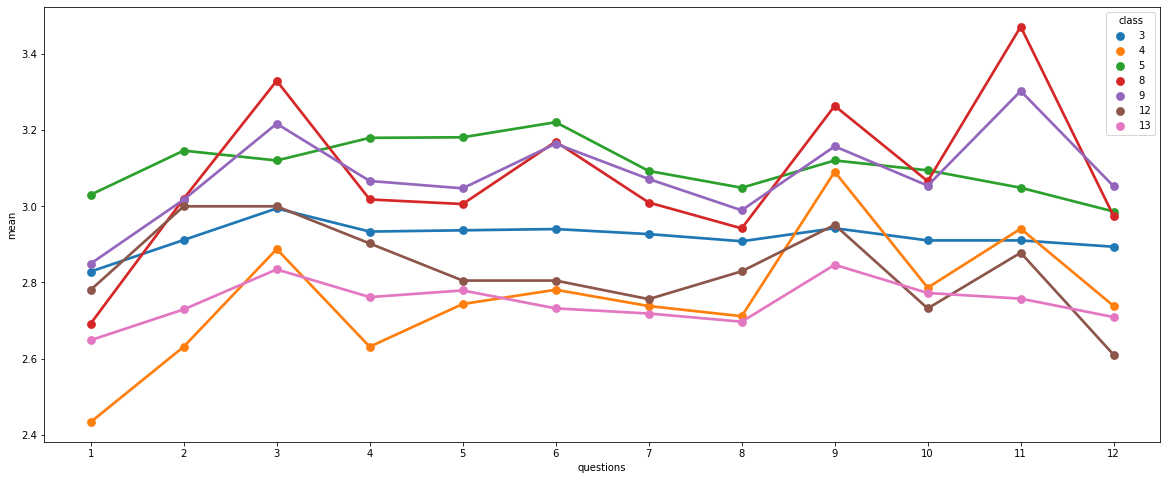

In [22]:
plt.figure(figsize=(20, 8))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class");

By above analysis we can recommend the instructor 3 for check on course 4 and 13.

### Models
#### Firstly, we will try to reduce dimensionality.
 There are two principal algorithms for dimensionality reduction: Linear Discriminant Analysis ( LDA ) and Principal Component Analysis ( PCA ). The basic difference between these two is that LDA uses information of classes to find new features in order to maximize its separability while PCA uses the variance of each feature to do the same. In this context, LDA can be consider a supervised algorithm and PCA an unsupervised algorithm.

 The idea behind PCA is simply to find a low-dimension set of axes that summarize data. Many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each dataset with less properties. This is exactly what PCA aims to do.

In [23]:
data_questions = data.iloc[:,5:33]

In [24]:
#lets do a PCA for feature dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_questions_pca = pca.fit_transform(data_questions)

## KMeans Clustering

In [25]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

cluster_range =range(1,11)
wcss = []

for i in cluster_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42 )
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': wcss})

,num_clusters,Error
0,1,373025.672852
1,2,231353.801551
2,3,180375.926930
3,4,152888.246073
4,5,133015.589696
5,6,119620.319351
6,7,112341.084815
7,8,105896.168107
8,9,101323.877734
9,10,97525.451170


#### Elbow Plot

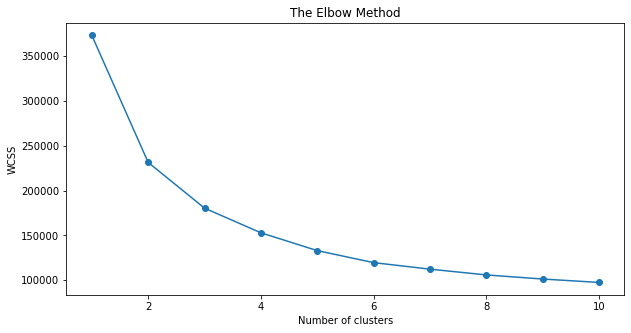

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the Elbow graph , we can go for 3 clusters.

The K-means algorithm identifies k(here k=3) number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data_questions_pca)

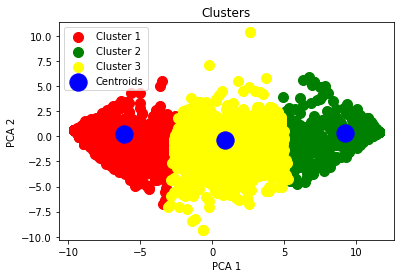

In [28]:
# Visualising the clusters
plt.scatter(data_questions_pca[y_kmeans == 0, 0], data_questions_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_questions_pca[y_kmeans == 1, 0], data_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(data_questions_pca[y_kmeans == 2, 0], data_questions_pca[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

Looking at the above graph, we saw 3 clusters of students who have given like Negative, Neutral and Positive feedback

In [29]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_kmeans)

Counter({2: 2359, 0: 2221, 1: 1240})

So we have 2223 students who have given negative ratings overall , 1234 students with positive ratings and 2363 students with nuetral response

## Hierarchical Clustering

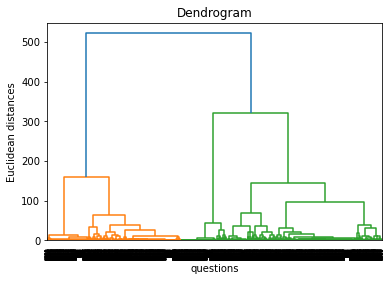

In [30]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

## *Agglomerative Clustering :*

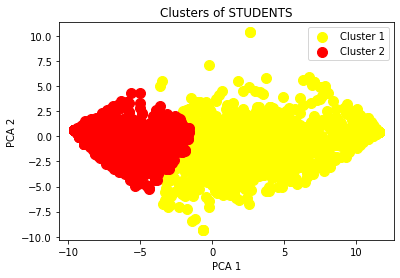

In [31]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_questions_pca)
X = data_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [32]:
# Let me check the count of students in each cluster
import collections
collections.Counter(y_hc)

Counter({0: 3502, 1: 2318})

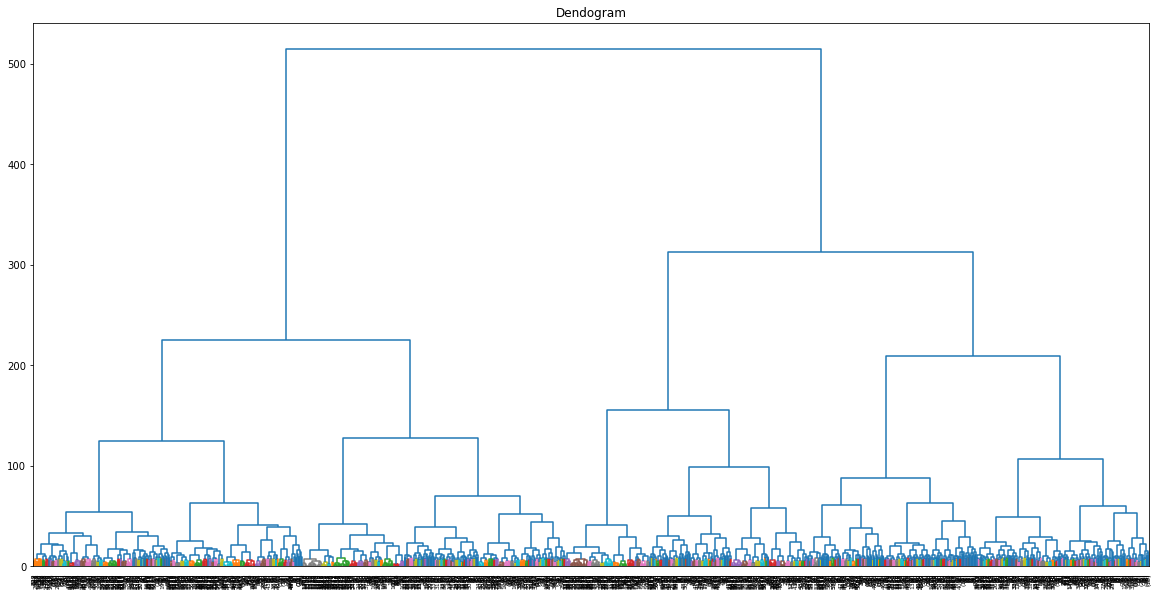

In [33]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
Z = linkage(data, method='ward')
dendrogram(Z, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.title('Dendogram')
plt.show()

# *Convert Unsupervised data into Supervised data :*

In [34]:
df=data.copy()

In [35]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(df)
df['label'] = kmeans.labels_
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [36]:
df['label'].value_counts()

2    2363
0    2223
1    1234
Name: label, dtype: int64

# *PCA :*

# *Scaling :*

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

**Since the data is already scaled , now apllying PCA fro dimensionality reduction :** 

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA()
pca.fit(data)

PCA()

In [41]:
data_pca= pca.transform(data)
data_pca.shape

(5820, 33)

In [42]:
pca.components_

array([[ 0.02702299,  0.00763628,  0.00904588, ..., -0.1915978 ,
        -0.18721786, -0.1883336 ],
       [-0.07289543, -0.04063568, -0.00266056, ...,  0.03244089,
        -0.001601  ,  0.0978247 ],
       [-0.4385327 , -0.05890652, -0.05937739, ..., -0.11049305,
        -0.07491874, -0.1782587 ],
       ...,
       [-0.00853126,  0.00216576, -0.00279446, ...,  0.01915656,
        -0.02403839, -0.0265742 ],
       [ 0.00364928,  0.00044748, -0.00320714, ..., -0.01714022,
        -0.01096761, -0.01669541],
       [ 0.00057773,  0.0025222 ,  0.00431929, ..., -0.0080973 ,
        -0.04233965,  0.07289184]])

In [43]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.70013168, 0.74537307, 0.78256401, 0.81671962, 0.84803889,
       0.8727493 , 0.88870744, 0.9004264 , 0.9109943 , 0.91970124,
       0.92737397, 0.93353888, 0.9390824 , 0.94424931, 0.94854474,
       0.95272728, 0.95685887, 0.96045734, 0.96397825, 0.96742752,
       0.97073759, 0.9739328 , 0.97697171, 0.97985678, 0.98266244,
       0.98522485, 0.98777721, 0.9902038 , 0.99254658, 0.99468954,
       0.99673926, 0.99842948, 1.        ])

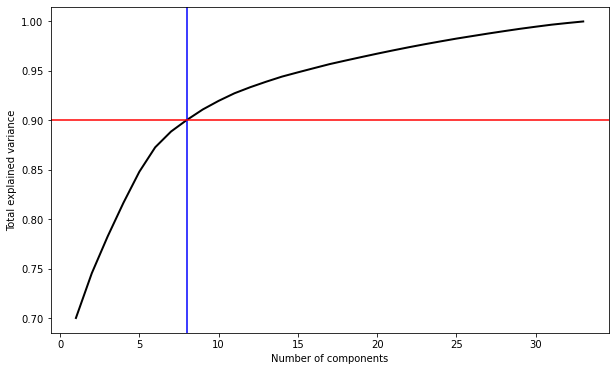

In [44]:
plt.figure(figsize=(10,6))

plt.plot(range(1,34), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

**90 percent of data consists 8 components.**

In [45]:
pca = PCA(n_components=8)
pca.fit(data)
data_pca = pd.DataFrame(pca.transform(data))
data_pca.shape

(5820, 8)

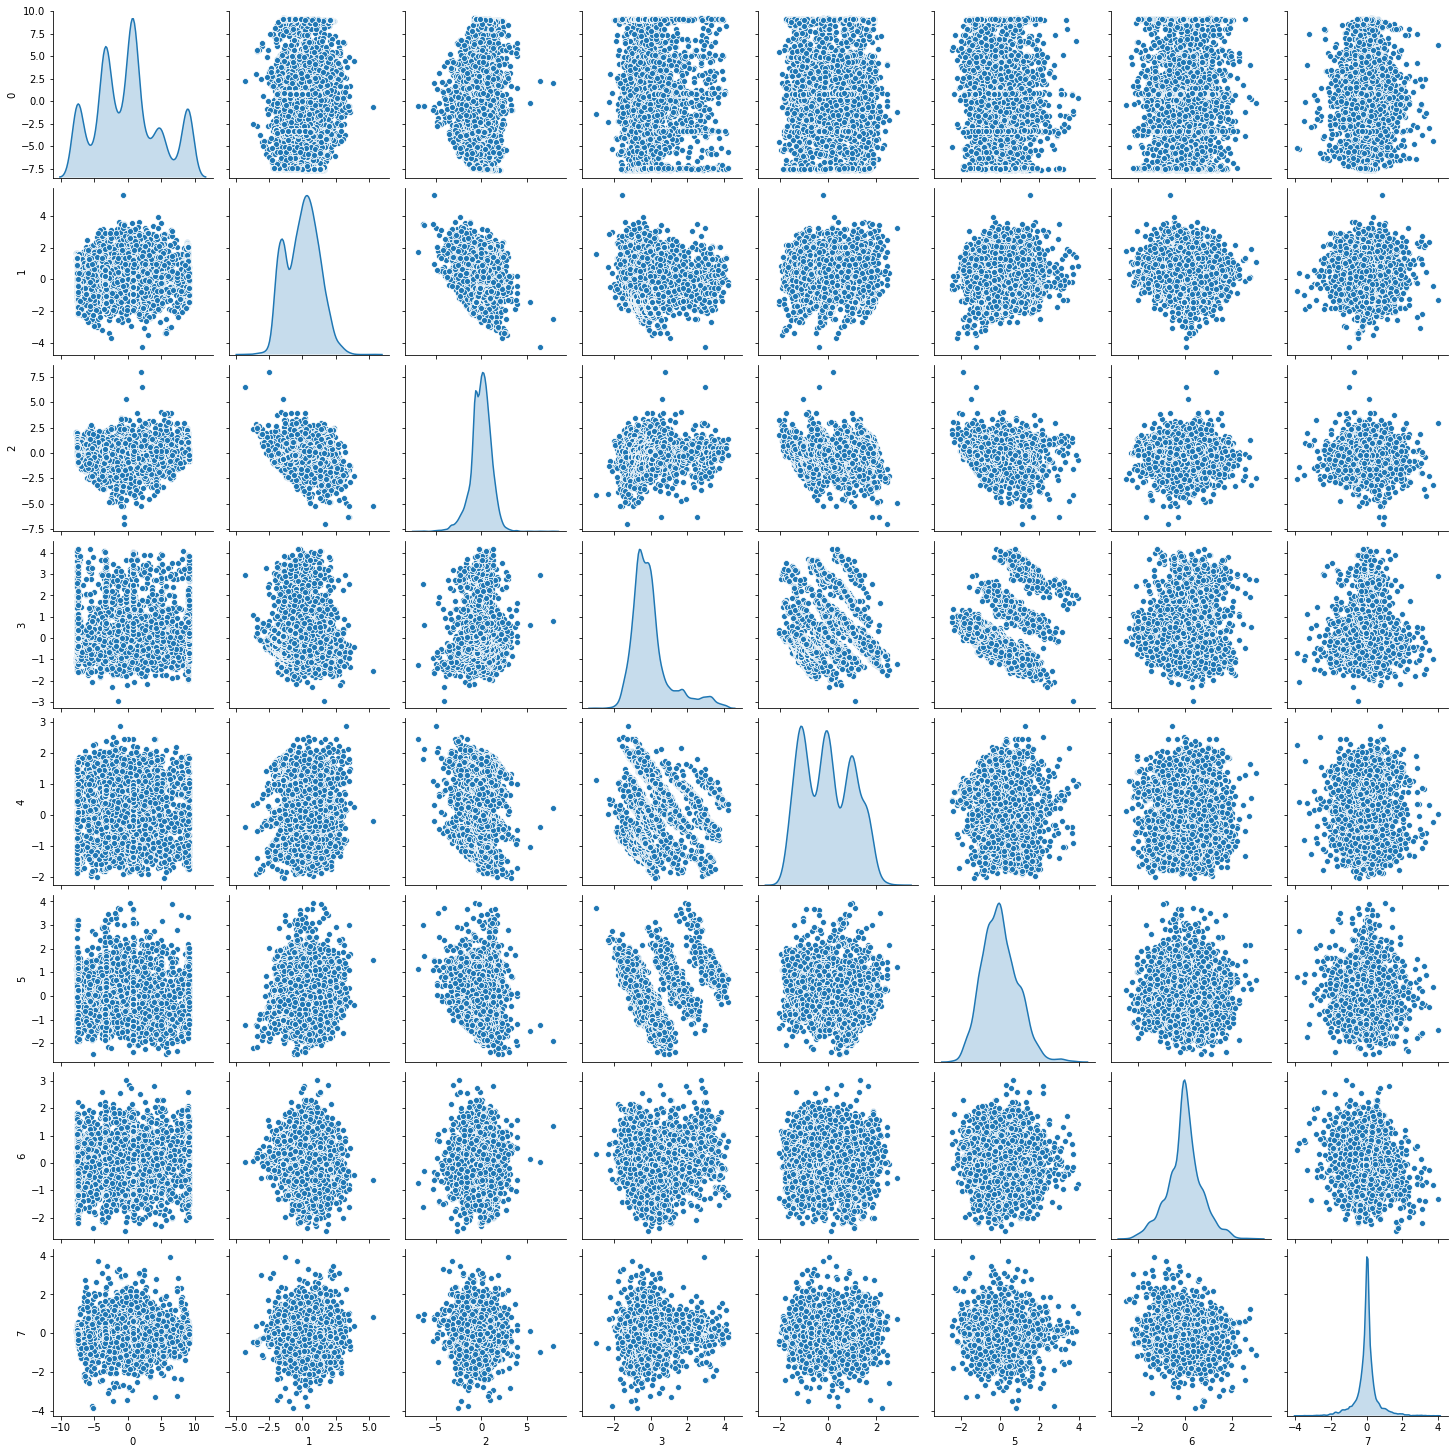

In [46]:
sns.pairplot(data_pca, diag_kind='kde')
plt.show()

### *Kmeans Clustering :*

In [47]:
cluster_range = range(1,16)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10, max_iter=100)
    clusters.fit(data_pca)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,172935.846128
1,2,86036.333407
2,3,54858.697020
3,4,46470.745708
4,5,41391.990645
5,6,38618.084491
6,7,36877.330882
7,8,35543.070874
8,9,34295.651505
9,10,32833.015301


**Elbow Plot :**

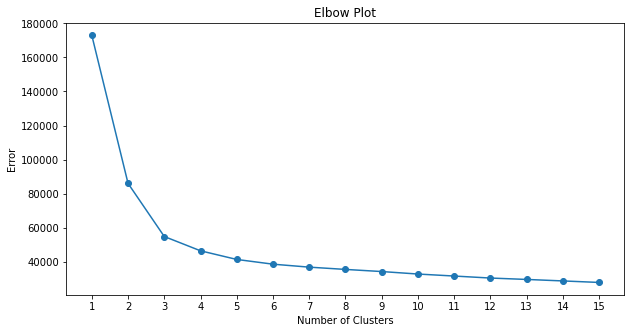

In [48]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

In [49]:
pca_df = data_pca.copy()
kmeans = KMeans(3, n_init=10, max_iter=100)
kmeans.fit(pca_df)
pca_df['label'] = kmeans.labels_
pca_df['label'].value_counts()

0    2363
1    2224
2    1233
Name: label, dtype: int64

### *Agglomerative Clustering :*

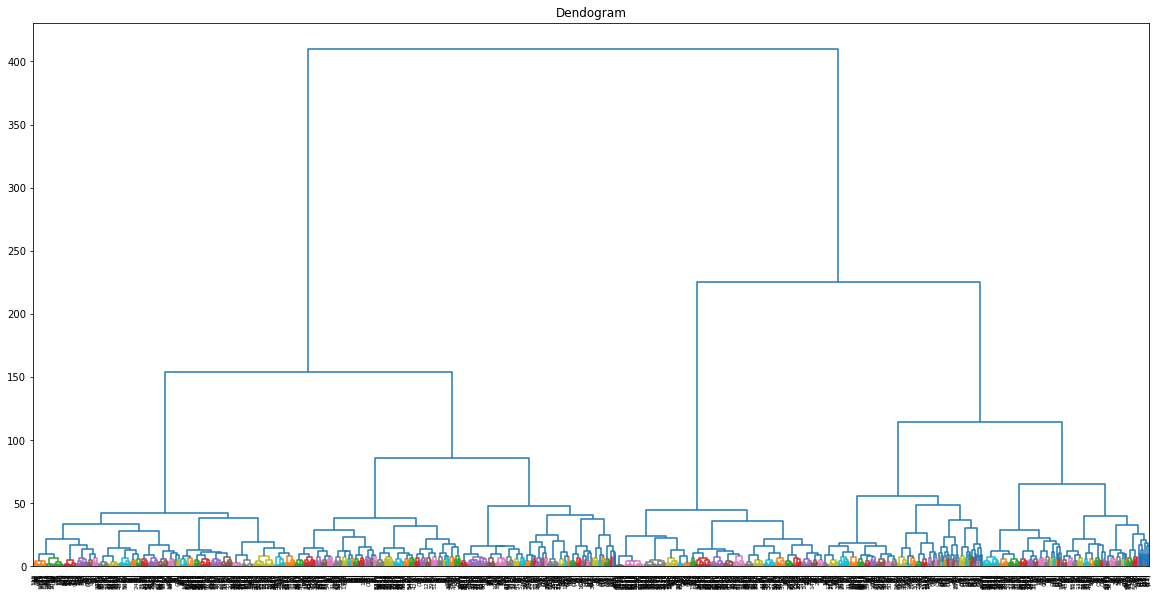

In [50]:
plt.figure(figsize=(20,10))
link = linkage(data_pca, method='ward')
dendrogram(link, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.title('Dendogram')
plt.show()

**From the above dendogram we can see 3 clusters.**

In [51]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
ac.fit(data_pca)

AgglomerativeClustering(n_clusters=3)

In [52]:
y_ac=ac.fit_predict(data_pca)

In [53]:
first0=[2226,2756]
second1=[1231,2379]
third2=[2363,685]
clusters=['Kmeans','Agglm Cluster']
d=pd.DataFrame({'Clusters':clusters,'FirstC':first0,'SecondC':second1,'ThirdC':third2})
d

,Clusters,FirstC,SecondC,ThirdC
0,Kmeans,2226,1231,2363
1,Agglm Cluster,2756,2379,685


**Inference :**
* First cluster is some what nearer in both the methods.

# *Splitting the data before PCA :*

In [54]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,2
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [55]:
X=df.drop(columns='label')
y=df['label']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4074, 33)
(1746, 33)
(4074,)
(1746,)


### *Logistic Regression :*

In [58]:
from sklearn import metrics

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

C:\Users\Tolu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
print('Training score =', lr.score(Xtrain, ytrain))
print('Test score =', lr.score(Xtest, ytest))

Training score = 0.9842906234658811
Test score = 0.9713631156930126


In [61]:
ypred1=lr.predict(Xtest)

In [62]:
acc1=(metrics.accuracy_score(ytest,ypred1))
acc1

0.9713631156930126

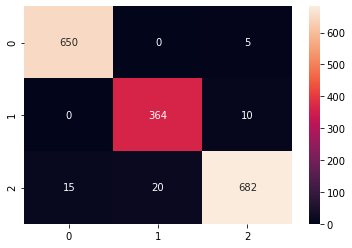

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

**Model is good fit.**

### *Decision Tree Classifier :*

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 1.0
Test score = 0.936426116838488


In [65]:
ypred2=dt.predict(Xtest)

In [66]:
acc2=(metrics.accuracy_score(ytest,ypred2))
acc2

0.936426116838488

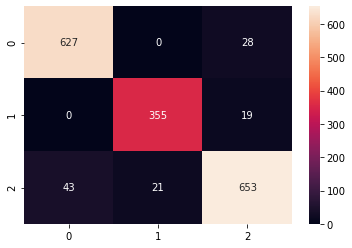

In [67]:
cm = confusion_matrix(ytest, ypred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

**Model is under fit.**

### *KNN :*

In [68]:
from sklearn.neighbors import KNeighborsClassifier

score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    ypred3=knn.predict(Xtest)
    accuracy=metrics.accuracy_score(ypred3,ytest)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9553264604810997
2 :  0.9473081328751431
3 :  0.9621993127147767
4 :  0.9558991981672395
5 :  0.9593356242840779
6 :  0.95475372279496
7 :  0.9610538373424972
8 :  0.9581901489117984
9 :  0.9581901489117984
10 :  0.9564719358533792
11 :  0.9616265750286369
12 :  0.9570446735395189
13 :  0.9616265750286369
14 :  0.9576174112256587
15 :  0.9604810996563574
16 :  0.9570446735395189
17 :  0.9581901489117984
18 :  0.95475372279496
19 :  0.9570446735395189
20 :  0.9570446735395189
21 :  0.9570446735395189
22 :  0.9570446735395189
23 :  0.9576174112256587
24 :  0.9570446735395189
25 :  0.9570446735395189
26 :  0.9558991981672395
27 :  0.9576174112256587
28 :  0.9564719358533792
29 :  0.9570446735395189
30 :  0.9564719358533792
31 :  0.9558991981672395
32 :  0.9518900343642611
33 :  0.9553264604810997
34 :  0.9524627720504009
35 :  0.9524627720504009
36 :  0.9495990836197021
37 :  0.9507445589919816
38 :  0.9495990836197021
39 :  0.9518900343642611
40 :  0.9513172966781214
41 :  0.95246

In [69]:
score.index(max(score))+1

3

In [70]:
round(max(score))

96

In [71]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.970054000981836
Test score = 0.9581901489117984


**Model is good fit:**

### *Naive Bayes :*

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

print('Training score =', gnb.score(Xtrain, ytrain))
print('Test score =', gnb.score(Xtest, ytest))

Training score = 0.9864997545409917
Test score = 0.9856815578465064


**Model is Best Fit.**

In [74]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[0.985,1.00,0.977,0.988]
Test_Accuracy=[0.975,0.939,0.963,0.988]

In [75]:
Before_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Before_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.985,0.975
1,Decision Tree,1.000,0.939
2,KNN,0.977,0.963
3,Naive Bayes,0.988,0.988


**Inference :**
* Naive Bayes algorithm has performed well with an accuracy 0f 98.8 percent.
* Decision Tree has not performed well and it is under fit.

# *Splitting the data after PCA :*

In [76]:
df1=data_pca.copy()

In [77]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(df1)
df1['label'] = kmeans.labels_
df1.head()

,0,1,2,3,4,5,6,7,label
0,0.742313,-0.109721,1.314249,-1.204993,-0.270150,1.967466,-1.256530,-0.213722,1
1,0.727500,-0.147146,1.281206,-1.411375,-0.169145,1.776012,-0.331610,0.002834,1
2,-7.586498,0.364229,1.519714,-1.093796,-0.341107,1.509401,-0.487945,-0.019866,2
3,0.727500,-0.147146,1.281206,-1.411375,-0.169145,1.776012,-0.331610,0.002834,1
4,9.054785,-1.113471,0.825711,-1.913834,0.105926,2.042082,0.308109,0.148566,0


In [78]:
X1=df1.drop(columns='label')
y1=df1['label']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4074, 8)
(1746, 8)
(4074,)
(1746,)


### *Logistic Regression :*

In [80]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)
print('Training score =', lr_pca.score(X_train, y_train))
print('Test score =', lr_pca.score(X_test, y_test))

Training score = 0.9980363279332352
Test score = 0.9959908361970218


**Model is good fit.**

### *Decision Tree Classifier :*

In [81]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train, y_train)
print('Training score =', dt_pca.score(X_train, y_train))
print('Test score =', dt_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.9971363115693013


**Model is somewhat underfit.**

### *KNN :*

In [82]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    accuracy=metrics.accuracy_score(ypred,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9707903780068728
2 :  0.9719358533791523
3 :  0.9765177548682703
4 :  0.9730813287514318
5 :  0.9765177548682703
6 :  0.979381443298969
7 :  0.9799541809851088
8 :  0.9759450171821306
9 :  0.9776632302405498
10 :  0.9765177548682703
11 :  0.9776632302405498
12 :  0.97709049255441
13 :  0.97709049255441
14 :  0.9782359679266895
15 :  0.9759450171821306
16 :  0.9788087056128293
17 :  0.97709049255441
18 :  0.97709049255441
19 :  0.9788087056128293
20 :  0.979381443298969
21 :  0.979381443298969
22 :  0.9799541809851088
23 :  0.9788087056128293
24 :  0.9782359679266895
25 :  0.9776632302405498
26 :  0.9776632302405498
27 :  0.9765177548682703
28 :  0.9776632302405498
29 :  0.9765177548682703
30 :  0.9765177548682703
31 :  0.9736540664375716
32 :  0.9753722794959908
33 :  0.9765177548682703
34 :  0.9747995418098511
35 :  0.9765177548682703
36 :  0.9759450171821306
37 :  0.9753722794959908
38 :  0.9747995418098511
39 :  0.9753722794959908
40 :  0.9747995418098511
41 :  0.974799541809

In [83]:
score.index(max(score))+1

7

In [84]:
(max(score))

97.99541809851088

In [85]:
knn_pca = KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_train, y_train)

print('Training score =', knn_pca.score(X_train, y_train))
print('Test score =', knn_pca.score(X_test, y_test))

Training score = 0.9874815905743741
Test score = 0.9799541809851088


**Model is good fit.**

### *Naive Bayes :*

In [86]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train, y_train)
print('Training score =', gnb_pca.score(X_train, y_train))
print('Test score =', gnb_pca.score(X_test, y_test))

Training score = 0.9759450171821306
Test score = 0.9673539518900344


**Model is good fit.**

In [87]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[0.987,1.00,0.987,0.975]
Test_Accuracy=[0.979,0.995,0.980,0.967]

In [88]:
After_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
After_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.987,0.979
1,Decision Tree,1.000,0.995
2,KNN,0.987,0.980
3,Naive Bayes,0.975,0.967


**Inference :**
* All the models performed well.
* Decision Tree has 100% on training and 99.5% on testing.

# *Final Model :*

In [89]:
Algorithm=['LR BPCA','DT BPCA','KNN BPCA','NB BPCA','LR APCA','DT APCA','KNN APCA','NB APCA']
Train_Accuracy=[0.985,1.00,0.977,0.988,0.987,1.00,0.987,0.975]
Test_Accuracy=[0.975,0.939,0.963,0.988,0.979,0.995,0.980,0.967]

In [90]:
Final = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Final

,Algorithm,Train_Accuracy,Test_Accuracy
0,LR BPCA,0.985,0.975
1,DT BPCA,1.000,0.939
2,KNN BPCA,0.977,0.963
3,NB BPCA,0.988,0.988
4,LR APCA,0.987,0.979
5,DT APCA,1.000,0.995
6,KNN APCA,0.987,0.980
7,NB APCA,0.975,0.967


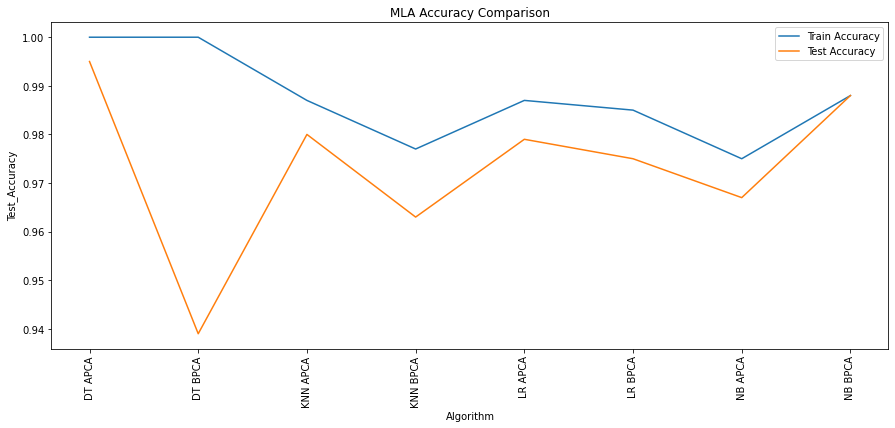

In [91]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="Algorithm", y="Train_Accuracy",data=Final,palette='hot',label='Train Accuracy')
sns.lineplot(x="Algorithm", y="Test_Accuracy",data=Final,palette='hot',label='Test Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

**Inference :**
* Naive Bayes before PCA  performed well.
* Logistic Regression after PCA performed well.
* Naive Bayes(Before PCA) is the best model from all the model where training and testing sores are equal.